# Aim: The main aim to predict the financial sentiment of people based on news

In [1]:
#importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings


In [2]:
#loading the file
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth',400)
df=pd.read_csv('sentiment.csv', encoding='ISO-8859-1')
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .


In [3]:
#checking the shape
df.shape

(4845, 2)

In [4]:
#Checking the unique values in target feature
df.neutral.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [5]:
#total number features
df.columns

Index(['neutral', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'], dtype='object')

In [6]:
#Renaming the features
df.rename(columns={'neutral':'Review','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'text'},inplace=True)

In [7]:
df.head()

,Review,text
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .


In [8]:
#printing the first five positive reviews
df[df['Review']=='positive'].head()

,Review,text
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .
5,positive,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m ."
6,positive,"In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn ."


In [9]:
#printing the first five negative reviews
df[df['Review']=='negative'].head()

,Review,text
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
414,negative,A tinyurl link takes users to a scamming site promising that users can earn thousands of dollars by becoming a Google ( NASDAQ : GOOG ) Cash advertiser .
420,negative,"Compared with the FTSE 100 index , which rose 36.7 points ( or 0.6 % ) on the day , this was a relative price change of -0.2 % ."
422,negative,"Compared with the FTSE 100 index , which rose 94.9 points ( or 1.6 % ) on the day , this was a relative price change of -0.4 % ."
499,negative,One of the challenges in the oil production in the North Sea is scale formation that can plug pipelines and halt production .


In [10]:
#printing the first five neutral reviews
df[df['Review']=='neutral'].head()

,Review,text
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
57,neutral,"At the request of Finnish media company Alma Media 's newspapers , research manager Jari Kaivo-oja at the Finland Futures Research Centre at the Turku School of Economics has drawn up a future scenario for Finland 's national economy by using a model developed by the University of Denver ."
58,neutral,"In Sweden , Gallerix accumulated SEK denominated sales were down 1 % and EUR denominated sales were up 11 % ."
59,neutral,The company supports its global customers in developing new technologies and offers a fast route from product development to applications and volume production .
60,neutral,"When this investment is in place , Atria plans to expand into the Moscow market ."


## EDA(Exploratary Data Analysis) 

- Exploratory Data Analysis can be carried out in text data set based on the number of comments, positive comments, negative comments,
  neutral comments etc.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  4845 non-null   object
 1   text    4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


- Here, from the output we can infer that there are 4845 records available in the dataset.So, we are going to create a countplot 
  to compare positive, negative and neutral comments.

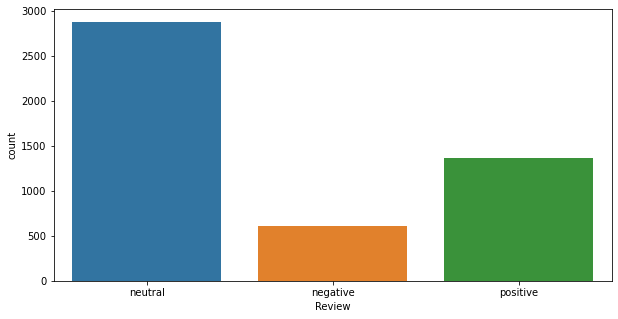

In [12]:
#Exploring the dataset
plt.figure(figsize=(10,5))
sns.countplot(df['Review'])

- Here , from the above output we can infer that neutral comments has more frequency compare to positive and negative comments.
- The negative comments has least number of frequency.

In [13]:
#Removing Punctuations
df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
df.head()

,Review,text
0,neutral,Technopolis plans to develop in stages an area of no less than square meters in order to host companies working in computer technologies and telecommunications the statement said
1,negative,The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily Postimees reported
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability
3,positive,According to the company s updated strategy for the years Basware targets a long term net sales growth in the range of with an operating profit margin of of net sales
4,positive,FINANCING OF ASPOCOMP S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs


In [14]:
#Converting the reviews into lowercase
for index in df.columns:
    df[index]=df[index].str.lower()
df.sample()    

,Review,text
4460,positive,technical indicators for the stock are bullish and s p gives nok a positive stars out of buy ranking


In [21]:
#combining all the reviews together
feedback=[]
for row in range(0,len(df.index)):
    feedback.append(' '.join(str(x) for x in df.iloc[row,0:]))
feedback[2261]

'positive    ntc has a geographical presence that complements ramirent  s existing network and brings us closer to our customers in the east bohemia region in the czechrepublic     '

## Text Preprocessing 

- Unlike structured data, features(inpendent features) are not explicitly available in the text data.Thus, we need to use a process
  to extract features from the text data.One way is to consider each word as a feature and find a measure to capture whether a word 
  exists or doesnot exist in a sentence.This is called the bag-of-words(BoW) model.
- Bag-of-Word(BoW) Model: The first step to creating a BoW is to create a dictionary of the words used in corpus.At this stage, we will not worry about grammar and only occurence of the word is captured.Then we will convert each document to a vector that represents the words available in the document.There are 3 ways to identify the imporantce of words in a BoW model:
        1.Count Vector Model
        2.Term Frequency Vector Model
        3.Term Frequency-Inverse Document Frequency(TF-IDF) Model
        

## TF-IDF Vectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_vect=TfidfVectorizer()
df_feature=tfid_vect.fit_transform(feedback)

In [23]:
#Applying Naive-Bayes Algorithm for model creation/classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_feature,df.Review,test_size=0.2,random_state=0)
nb_clf=GaussianNB()
nb_clf.fit(x_train.toarray(),y_train)

GaussianNB()

In [24]:
#Checking the accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
prediction=nb_clf.predict(x_test.toarray())
print("accuracy:",accuracy_score(prediction,y_test))
print('confusion matrix:',confusion_matrix(prediction,y_test))
print('classification report:',classification_report(prediction,y_test))

accuracy: 0.7120743034055728
confusion matrix: [[ 54  13  36]
 [ 37 520 104]
 [ 26  63 116]]
classification report:               precision    recall  f1-score   support

    negative       0.46      0.52      0.49       103
     neutral       0.87      0.79      0.83       661
    positive       0.45      0.57      0.50       205

    accuracy                           0.71       969
   macro avg       0.60      0.63      0.61       969
weighted avg       0.74      0.71      0.72       969



In [25]:
from sklearn.ensemble import RandomForestClassifier
rn_cls=RandomForestClassifier()
rn_cls.fit(x_train.toarray(),y_train)

RandomForestClassifier()

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
prediction=rn_cls.predict(x_test.toarray())
print("accuracy:",accuracy_score(prediction,y_test))
print('confusion matrix:',confusion_matrix(prediction,y_test))
print('classification report:',classification_report(prediction,y_test))

accuracy: 0.9969040247678018
confusion matrix: [[116   0   1]
 [  0 596   1]
 [  1   0 254]]
classification report:               precision    recall  f1-score   support

    negative       0.99      0.99      0.99       117
     neutral       1.00      1.00      1.00       597
    positive       0.99      1.00      0.99       255

    accuracy                           1.00       969
   macro avg       0.99      1.00      0.99       969
weighted avg       1.00      1.00      1.00       969



- Here, we can see that our model is giving the pretty good accuracy when we used RandomForestClassifier 99.69 % and when we used Naive Bayes accuracy is getting reduced to 71.20 %